# WeatherPy
----

### Analysis
(1) 

(2)

(3)

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set empty lists to store values and create count variables
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

In [5]:
# Set to imperial units 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# Print header before looping data
print("Beginning Data Retrieval")
print("-"*25)

# Loop over list of cities 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        # Update record and set numbers
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print(f"City '{city}' not found. Skipping...")

print("-"*25)
print("Data Retrieval Complete")
print("-"*25)


Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | hilo
City 'amderma' not found. Skipping...
Processing Record 4 of Set 1 | saint-joseph
Processing Record 5 of Set 1 | wagar
City 'garm' not found. Skipping...
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | flinders
City 'tsihombe' not found. Skipping...
Processing Record 9 of Set 1 | san cristobal
Processing Record 10 of Set 1 | alofi
Processing Record 11 of Set 1 | ushuaia
City 'halalo' not found. Skipping...
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | guerrero negro
Processing Record 14 of Set 1 | westport
Processing Record 15 of Set 1 | namatanai
Processing Record 16 of Set 1 | komsomolskiy
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | puro
Processing Record 19 of Set 1 | fortuna
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a pandas dataframe from the data retrieved from the API
weather_city_df = pd.DataFrame({
    "City" : city_name,
    "Cloud Coverage" : cloudiness,
    "City Country" : country,
    "City DateTime" : date,
    "Humidity" : humidity,
    "City Latitude" : lat,
    "City Longitude" : lng,
    "Max Temperature" : max_temp,
    "Wind Speed" : wind_speed
})

In [8]:
# Count data rows
weather_city_df.count()

City               563
Cloud Coverage     563
City Country       563
City DateTime      563
Humidity           563
City Latitude      563
City Longitude     563
Max Temperature    563
Wind Speed         563
dtype: int64

In [13]:
# Print the dataframe and drop duplicates
#weather_city_df.drop_duplicates()

In [14]:
# Print the dataframe
weather_city_df.head()

,City,Cloud Coverage,City Country,City DateTime,Humidity,City Latitude,City Longitude,Max Temperature,Wind Speed
0,Faanui,100,PF,1637639093,74,-16.4833,-151.7500,81.34,8.84
1,Tuktoyaktuk,40,CA,1637639093,77,69.4541,-133.0374,-5.80,10.36
2,Hilo,90,US,1637639094,96,19.7297,-155.0900,73.13,4.61
3,Saint-Joseph,17,RE,1637639094,67,-21.3667,55.6167,77.36,4.83
4,Wagar,18,SD,1637639095,75,16.1525,36.2032,71.24,10.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# Determine cities that have humidity greater than 100%
humidity_greater_100 = weather_city_df.loc[weather_city_df["Humidity"] > 100, :]

if humidity_greater_100.empty == True:
    print("There are no cities with humidity greater than 100%.")


There are no cities with humidity greater than 100%.


In [16]:
# Extract relevant fields from the data frame
# Becuase no cities have humidity greater than 100%, this step was skipped. 

# Export the City_Data into a csv
weather_city_df.to_csv("cities_weather_data.csv", index = False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

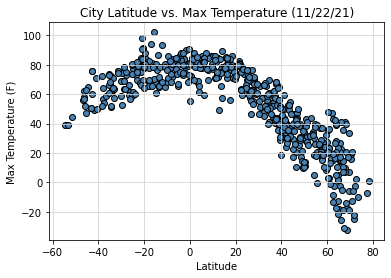

In [18]:
plt.scatter(weather_city_df["City Latitude"], weather_city_df["Max Temperature"], edgecolors="black", facecolors="steelblue")
plt.title("City Latitude vs. Max Temperature (11/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("Images/lat_maxtemp.png")


## Latitude vs. Humidity Plot

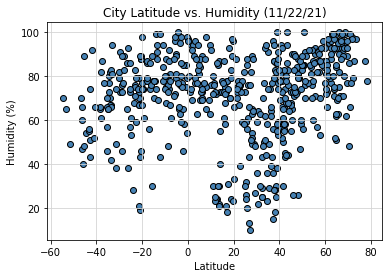

In [19]:
plt.scatter(weather_city_df["City Latitude"], weather_city_df["Humidity"], edgecolors="black", facecolors="steelblue")
plt.title("City Latitude vs. Humidity (11/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("Images/lat_humidity.png")


## Latitude vs. Cloudiness Plot

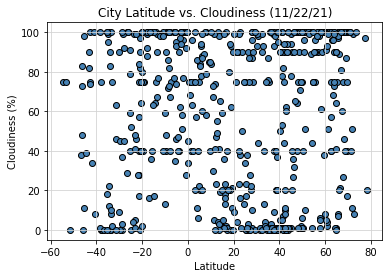

In [20]:
plt.scatter(weather_city_df["City Latitude"], weather_city_df["Cloud Coverage"], edgecolors="black", facecolors="steelblue")
plt.title("City Latitude vs. Cloudiness (11/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("Images/lat_cloudiness.png")


## Latitude vs. Wind Speed Plot

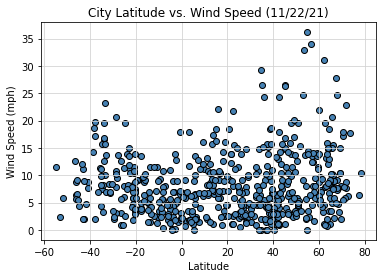

In [21]:
plt.scatter(weather_city_df["City Latitude"], weather_city_df["Wind Speed"], edgecolors="black", facecolors="steelblue")
plt.title("City Latitude vs. Wind Speed (11/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("Images/lat_windspeed.png")


## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


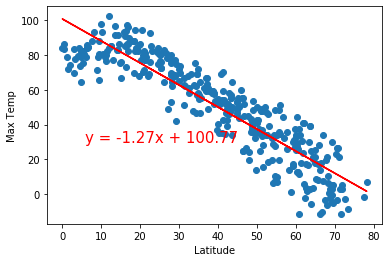

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


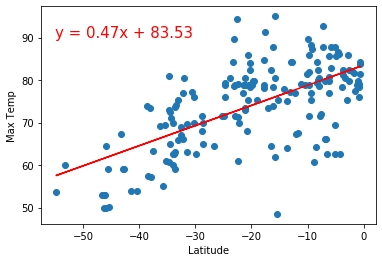

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


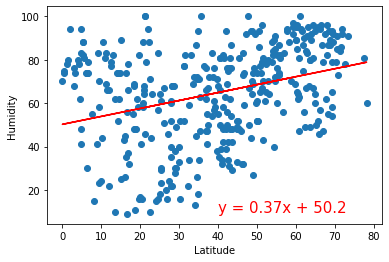

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


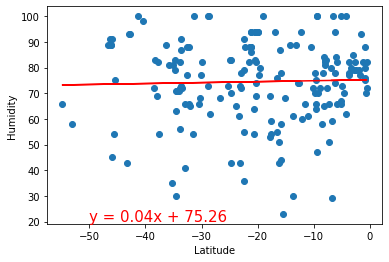

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


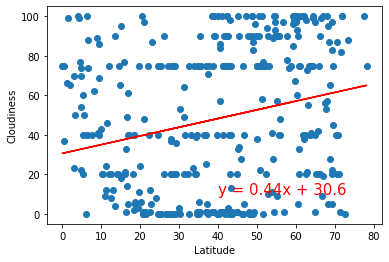

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


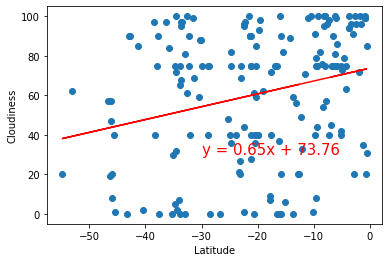

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


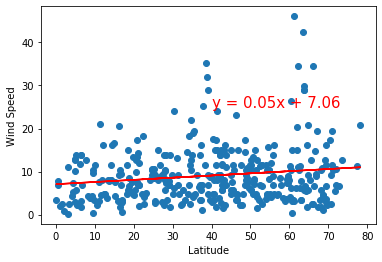

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


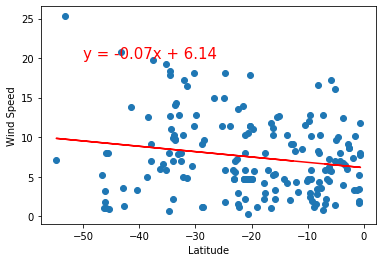